Fine particulate matter (PM2.5) is an ambient air pollutant for which there is strong evidence that it is harmful to human health. In the United States, the Environmental Protection Agency (EPA) is tasked with setting national ambient air quality standards for fine PM and for tracking the emissions of this pollutant into the atmosphere. Approximatly every 3 years, the EPA releases its database on emissions of PM2.5. This database is known as the National Emissions Inventory (NEI). You can read more information about the NEI at the [EPA National Emissions Inventory web site](http://www.epa.gov/ttn/chief/eiinformation.html).

For each year and for each type of PM source, the NEI records how many tons of PM2.5 were emitted from that source over the course of the entire year. The data that you will use for this assignment are for 1999, 2002, 2005, and 2008.

**Data**

The data for this assignment are available from the course web site as a single zip file:
* [Data](https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip)

The zip file contains two files:

PM2.5 Emissions Data (`summarySCC_PM25.rds`): This file contains a data frame with all of the PM2.5 emissions data for 1999, 2002, 2005, and 2008. For each year, the table contains number of tons of PM2.5 emitted from a specific type of source for the entire year. Here are the first few rows.

```python
##     fips      SCC Pollutant Emissions  type year
## 4  09001 10100401  PM25-PRI    15.714 POINT 1999
## 8  09001 10100404  PM25-PRI   234.178 POINT 1999
## 12 09001 10100501  PM25-PRI     0.128 POINT 1999
## 16 09001 10200401  PM25-PRI     2.036 POINT 1999
## 20 09001 10200504  PM25-PRI     0.388 POINT 1999
## 24 09001 10200602  PM25-PRI     1.490 POINT 1999
```

* `fips`: A five-digit number (represented as a string) indicating the U.S. county
* `SCC`: The name of the source as indicated by a digit string (see source code classification table)
* `Pollutant`: A string indicating the pollutant
* `Emissions`: Amount of PM2.5 emitted, in tons
* `type`: The type of source (point, non-point, on-road, or non-road)
* `year`: The year of emissions recorded

Source Classification Code Table (`Source_Classification_Code.rds`): This table provides a mapping from the SCC digit strings in the Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.

You can read each of the two files using the `readRDS()` function in R. For example, reading in each file can be done with the following code:

```python
## This first line will likely take a few seconds. Be patient!
NEI <- readRDS("summarySCC_PM25.rds")
SCC <- readRDS("Source_Classification_Code.rds")

```

as long as each of those files is in your current working directory (check by calling 
`dir()` and see if those files are in the listing).

**Assignment**

The overall goal of this assignment is to explore the National Emissions Inventory database and see what it say about fine particulate matter pollution in the United states over the 10-year period 1999–2008. You may use any R package you want to support your analysis.

Questions

You must address the following questions and tasks in your exploratory analysis. For each question/task you will need to make a single plot. Unless specified, you can use any plotting system in R to make your plot.

1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.
2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (`fips`=="24510") from 1999 to 2008? Use the base plotting system to make a plot answering this question.
3. Of the four types of sources indicated by the `type` (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008? Use the ggplot2 plotting system to make a plot answer this question.
4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?
5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City?
6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (`fips`=="06037"). Which city has seen greater changes over time in motor vehicle emissions?


In [1]:
library(ggplot2)

**Download the data**

In [2]:
if(!file.exists('./data')){dir.create('./data')}
# download the dataset
url <- 'https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip'

download.file(url = url, destfile = './data/nei.zip', method = 'curl')

# unzip it
unzip(zipfile = './data/nei.zip', exdir = './data')
list.files('./data')

[1] "household_power_consumption.txt" "nei.zip"                        
[3] "power.zip"                       "Source_Classification_Code.rds" 
[5] "summarySCC_PM25.rds"

In [3]:
# read files
NEI <- readRDS("./data/summarySCC_PM25.rds")
SCC <- readRDS("./data/Source_Classification_Code.rds")

In [4]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


In [5]:
summary(NEI)

     fips               SCC             Pollutant           Emissions       
 Length:6497651     Length:6497651     Length:6497651     Min.   :     0.0  
 Class :character   Class :character   Class :character   1st Qu.:     0.0  
 Mode  :character   Mode  :character   Mode  :character   Median :     0.0  
                                                          Mean   :     3.4  
                                                          3rd Qu.:     0.1  
                                                          Max.   :646952.0  
     type                year     
 Length:6497651     Min.   :1999  
 Class :character   1st Qu.:2002  
 Mode  :character   Median :2005  
                    Mean   :2004  
                    3rd Qu.:2008  
                    Max.   :2008  

In [6]:
head(SCC)

SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,


In [7]:
summary(SCC)

       SCC         Data.Category 
 10100101:    1   Biogenic:  82  
 10100102:    1   Event   :  71  
 10100201:    1   Nonpoint:2305  
 10100202:    1   Nonroad : 572  
 10100203:    1   Onroad  :1137  
 10100204:    1   Point   :7550  
 (Other) :11711                  
                                                          Short.Name   
                                                               :   61  
 Paved Roads /unknown /unknown                                 :   12  
 Unpaved Roads /unknown /unknown                               :   12  
 Misc Manuf / Indus Processes /Other Not Classified            :   10  
 Marine Vessels, Military /unknown                             :    8  
 Pulp&Paper&Wood /Fugitive Emissions /Specify in Comments Field:    6  
 (Other)                                                       :11608  
                                              EI.Sector   
 Industrial Processes - Storage and Transfer       :1955  
 Industrial Processes - Chemical M

In [8]:
dim(SCC)

[1] 11717    15

**1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.**

In [9]:
total <- with(NEI, tapply(NEI$Emissions, year, sum))
year_total <- data.frame(total)

In [10]:
year_total$years <- unique(NEI$year)
year_total

,total,years
,<dbl>,<int>
1999,7332967,1999
2002,5635780,2002
2005,5454703,2005
2008,3464206,2008


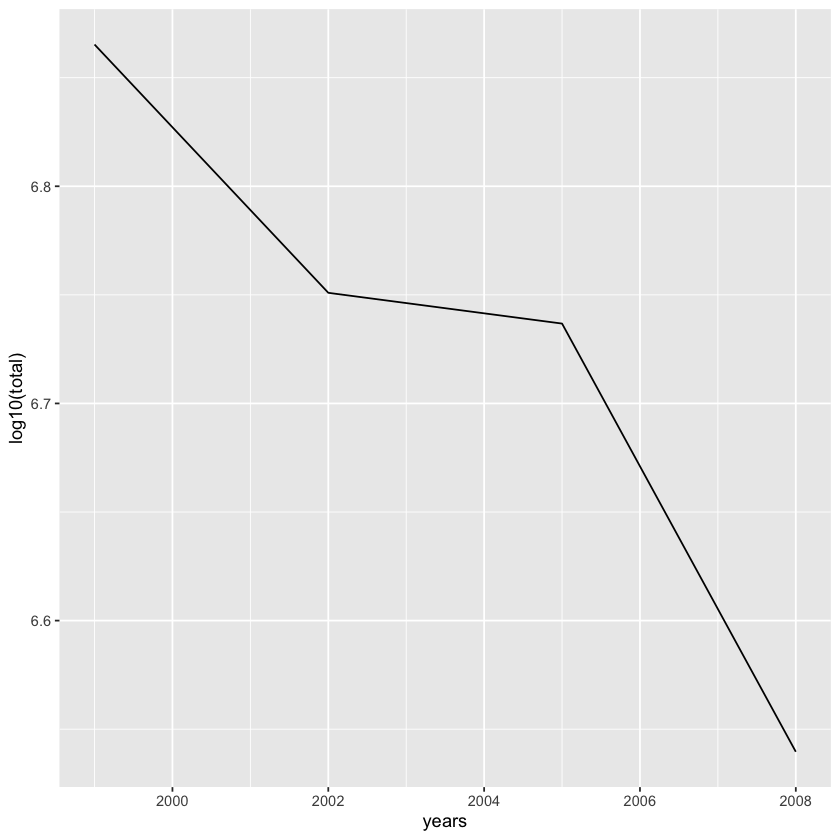

In [11]:
ggplot(year_total, aes(x = years, y = log10(total))) + geom_line()

**2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips=="24510") from 1999 to 2008? Use the base plotting system to make a plot answering this question.**

In [12]:
balsub <- subset(NEI, fips=="24510")
head(balsub)

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
114288,24510,10100601,PM25-PRI,6.532,POINT,1999
114296,24510,10200601,PM25-PRI,78.880,POINT,1999
114300,24510,10200602,PM25-PRI,0.920,POINT,1999
114308,24510,30100699,PM25-PRI,10.376,POINT,1999
114325,24510,30183001,PM25-PRI,10.859,POINT,1999
114329,24510,30201599,PM25-PRI,83.025,POINT,1999


In [13]:
total <- with(balsub, tapply(Emissions, year, sum))
year_total <- data.frame(total)
year_total$years <- unique(NEI$year)
year_total

,total,years
,<dbl>,<int>
1999,3274.180,1999
2002,2453.916,2002
2005,3091.354,2005
2008,1862.282,2008


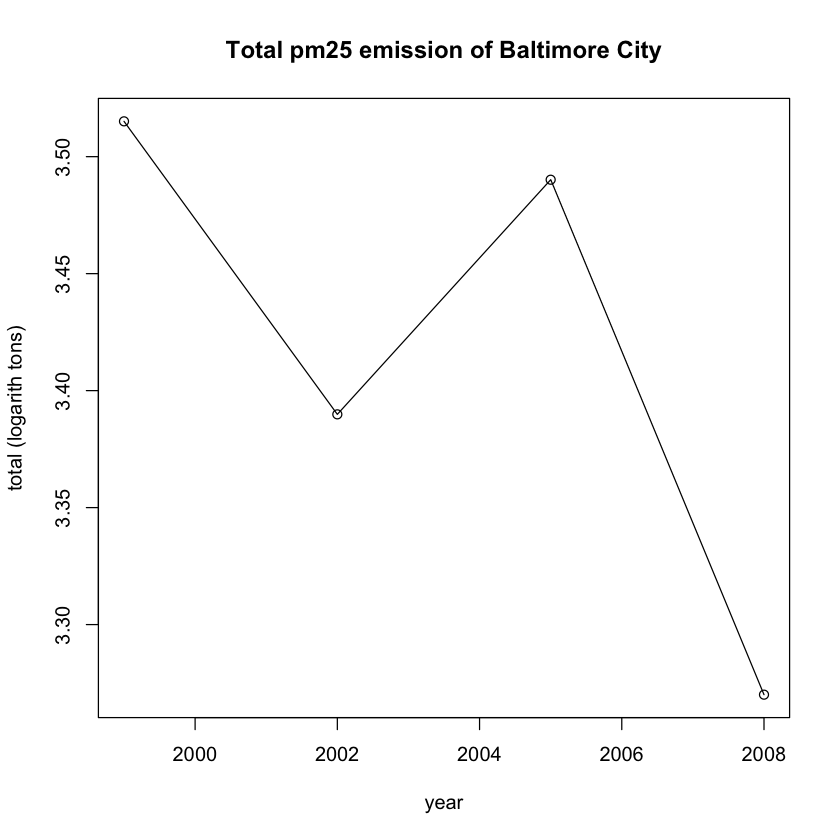

In [14]:
plot(year_total$years, log10(year_total$total), xlab = 'year', ylab = 'total (logarith tons)', main = 'Total pm25 emission of Baltimore City')
lines(year_total$years, log10(year_total$total)) 

**3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008? Use the ggplot2 plotting system to make a plot answer this question.**

In [15]:
types <- unique(balsub$type)
types

[1] "POINT"    "NONPOINT" "ON-ROAD"  "NON-ROAD"

In [28]:
df <- sapply(split(balsub, balsub$type), function(x) with(x, tapply(Emissions, year, sum)))
df

,NON-ROAD,NONPOINT,ON-ROAD,POINT
1999,522.94000,2107.625,346.82000,296.7950
2002,240.84692,1509.500,134.30882,569.2600
2005,248.93369,1509.500,130.43038,1202.4900
2008,55.82356,1373.207,88.27546,344.9752


In [42]:
dff <- data.frame(df)
dff$year = as.numeric(row.names(dff))
dff

,NON.ROAD,NONPOINT,ON.ROAD,POINT,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999,522.94000,2107.625,346.82000,296.7950,1999
2002,240.84692,1509.500,134.30882,569.2600,2002
2005,248.93369,1509.500,130.43038,1202.4900,2005
2008,55.82356,1373.207,88.27546,344.9752,2008


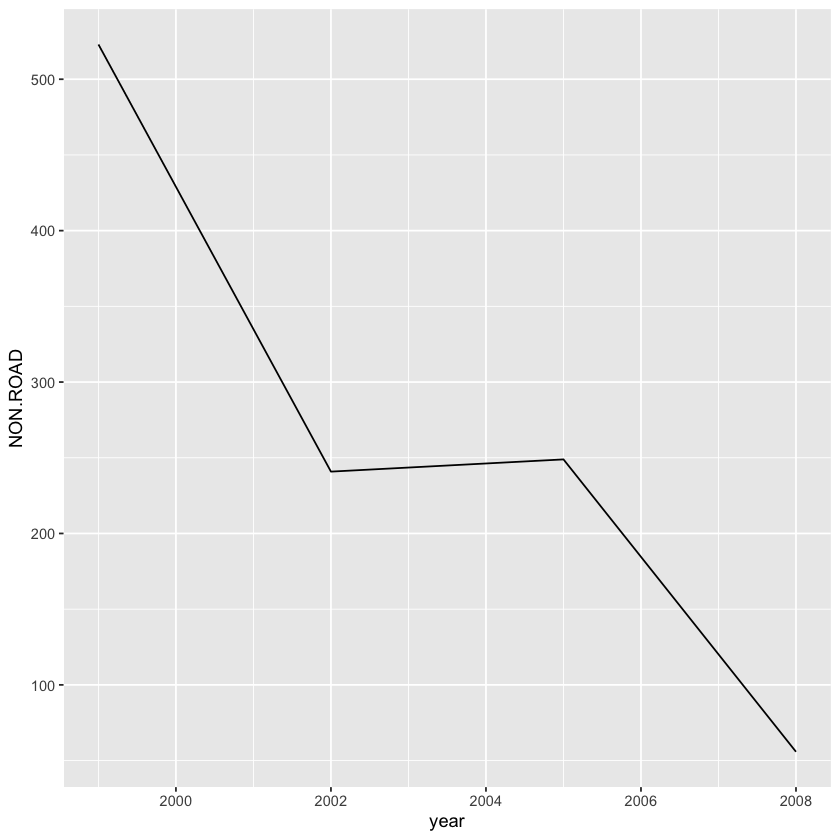

In [43]:
ggplot(dff, aes(x = year, y = NON.ROAD)) + geom_line()

In [44]:
library(reshape2)

In [46]:
melted <- melt(dff, id.var = 'year')
melted

year,variable,value
<dbl>,<fct>,<dbl>
1999,NON.ROAD,522.94000
2002,NON.ROAD,240.84692
2005,NON.ROAD,248.93369
2008,NON.ROAD,55.82356
1999,NONPOINT,2107.62500
2002,NONPOINT,1509.50000
2005,NONPOINT,1509.50000
2008,NONPOINT,1373.20731
1999,ON.ROAD,346.82000


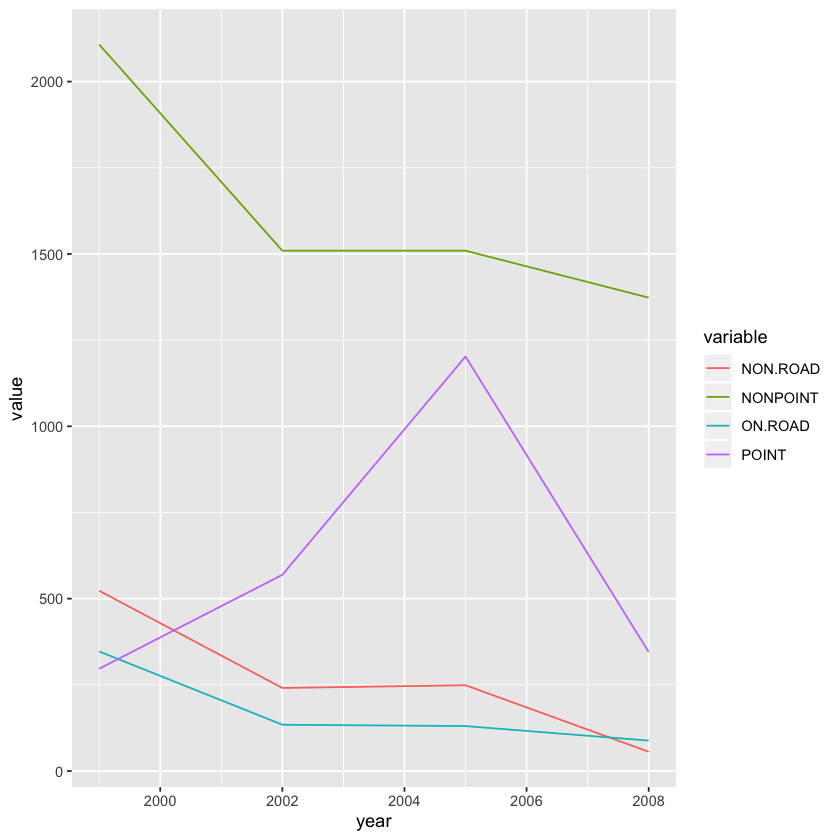

In [47]:
ggplot(melted, aes(x=year, y=value, col=variable)) + geom_line()

**4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?**

In [56]:
# subset the SCC that contains coal combustion related sources
scc_sub <- subset(SCC, grepl('Combustion', SCC.Level.One) & grepl('Coal', SCC.Level.Three))
dim(scc_sub)
head(scc_sub)

[1] 80 15

SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,


In [57]:
# subset the NEI using SCC in the list
nei_coal <- subset(NEI, SCC %in% scc_sub$SCC)
dim(nei_coal)
head(nei_coal)

[1] 40347     6

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
149,09001,2104001000,PM25-PRI,1.134,NONPOINT,1999
2277,09003,2104001000,PM25-PRI,3.842,NONPOINT,1999
4204,09005,2104001000,PM25-PRI,1.447,NONPOINT,1999
5967,09007,2104001000,PM25-PRI,1.574,NONPOINT,1999
7998,09009,2104001000,PM25-PRI,2.183,NONPOINT,1999
9979,09011,10100217,PM25-PRI,479.907,POINT,1999


In [64]:
coal_total <- with(nei_coal, tapply(nei_coal$Emissions, year, sum))
df_coal <- data.frame(coal_total)
df_coal$year = row.names(df_coal)
df_coal

,coal_total,year
,<dbl>,<chr>
1999,553207.4,1999
2002,530256.1,2002
2005,535130.2,2005
2008,335072.1,2008


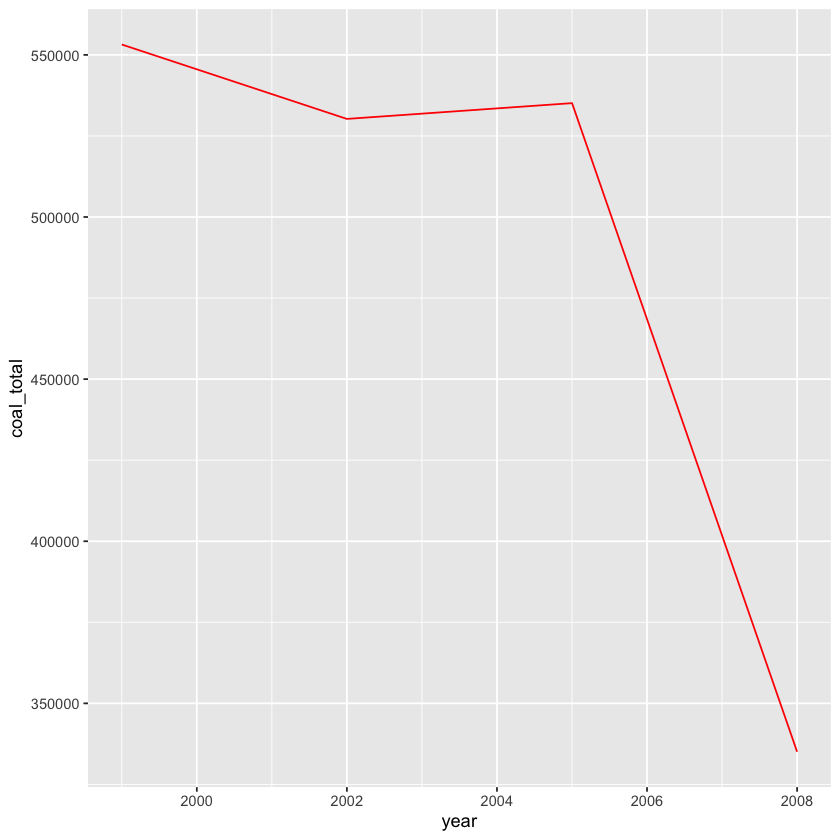

In [65]:
ggplot(dff, aes(x = year, y = coal_total)) + geom_line(color = 'red')

**5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City?**

In [91]:
# subset the SCC that contains coal combustion related sources
scc_sub <- subset(SCC, grepl('Motor Vehicle', SCC.Level.Three))
dim(scc_sub)
scc_sub

[1] 20 15

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
2902,2401070000,Nonpoint,Surface Coating /Motor Vehicles /Total: All Solvent Types,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Total: All Solvent Types,NA,NA,,,
2903,2401070030,Nonpoint,Surface Coating /Motor Vehicles /Acetone,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Acetone,NA,1999,,4/14/2003 0:00:00,
2904,2401070055,Nonpoint,Surface Coating /Motor Vehicles /Butyl Acetate,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Butyl Acetate,NA,1999,,4/14/2003 0:00:00,
2905,2401070060,Nonpoint,Surface Coating /Motor Vehicles /Butyl Alcohols: All Types,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Butyl Alcohols: All Types,NA,1999,,4/14/2003 0:00:00,
2906,2401070065,Nonpoint,Surface Coating /Motor Vehicles /n-Butyl Alcohol,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,n-Butyl Alcohol,NA,1999,,4/14/2003 0:00:00,
2907,2401070070,Nonpoint,Surface Coating /Motor Vehicles /Isobutyl Alcohol,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Isobutyl Alcohol,NA,1999,,4/14/2003 0:00:00,
2908,2401070125,Nonpoint,Surface Coating /Motor Vehicles /Diethylene Glycol Monobutyl Ether,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Diethylene Glycol Monobutyl Ether,NA,1999,,4/14/2003 0:00:00,
2909,2401070130,Nonpoint,Surface Coating /Motor Vehicles /Diethylene Glycol Monoethyl Ether,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Diethylene Glycol Monoethyl Ether,NA,1999,,4/14/2003 0:00:00,
2910,2401070135,Nonpoint,Surface Coating /Motor Vehicles /Diethylene Glycol Monomethyl Ether,Solvent - Industrial Surface Coating & Solvent Use,,,Solvent Utilization,Surface Coating,Motor Vehicles: SIC 371,Diethylene Glycol Monomethyl Ether,NA,1999,,4/14/2003 0:00:00,


In [93]:
baltimore_motor_vh <- subset(NEI, fips=="24510" & SCC %in% scc_sub$SCC)
baltimore_motor_vh

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4888524,24510,2810050000,PM25-PRI,10.17,NONPOINT,2002
11064649,24510,2810050000,PM25-PRI,10.17,NONPOINT,2005


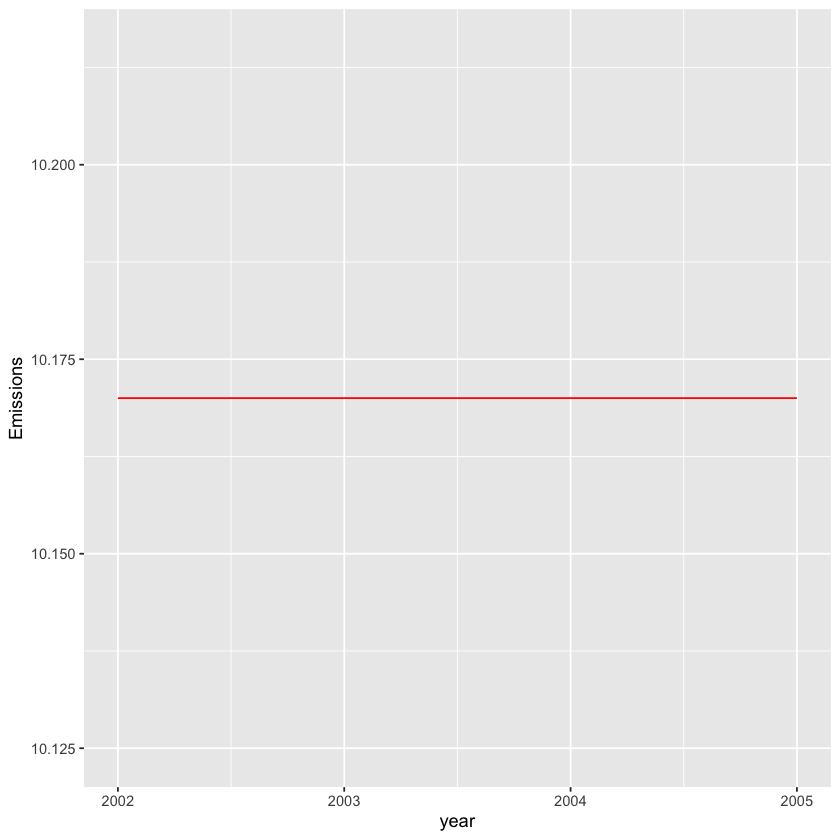

In [94]:
ggplot(baltimore_motor_vh, aes(x = year, y = Emissions)) + geom_line(color = 'red')

**6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips=="06037"). Which city has seen greater changes over time in motor vehicle emissions?**

In [95]:
# subset the SCC that contains coal combustion related sources
scc_sub <- subset(SCC, grepl('Motor Vehicle', SCC.Level.Three))

In [96]:
baltimore_motor_vh <- subset(NEI, fips=="24510" & SCC %in% scc_sub$SCC)
baltimore_motor_vh

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4888524,24510,2810050000,PM25-PRI,10.17,NONPOINT,2002
11064649,24510,2810050000,PM25-PRI,10.17,NONPOINT,2005


In [97]:
la_motor_vh <- subset(NEI, fips=="06037" & SCC %in% scc_sub$SCC)
la_motor_vh

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
1541907,06037,2810050000,PM25-PRI,61.4160,NONPOINT,1999
4702702,06037,2810050000,PM25-PRI,64.2800,NONPOINT,2002
10992694,06037,2810050000,PM25-PRI,64.2800,NONPOINT,2005
16437091,06037,2810050000,PM25-PRI,64.7296,NONPOINT,2008


In [104]:
merged <- merge(x = la_motor_vh, y = baltimore_motor_vh, by.x = 'year', by.y = 'year', all = TRUE)

myvars <- c("year", "Emissions.x", "Emissions.y")
merged <- merged[myvars]
merged

year,Emissions.x,Emissions.y
<int>,<dbl>,<dbl>
1999,61.4160,NA
2002,64.2800,10.17
2005,64.2800,10.17
2008,64.7296,NA


In [105]:
melted <- melt(merged, id.vars = 'year')
melted

year,variable,value
<int>,<fct>,<dbl>
1999,Emissions.x,61.4160
2002,Emissions.x,64.2800
2005,Emissions.x,64.2800
2008,Emissions.x,64.7296
1999,Emissions.y,NA
2002,Emissions.y,10.1700
2005,Emissions.y,10.1700
2008,Emissions.y,NA


Warning message:
“Removed 2 rows containing missing values (geom_path).”

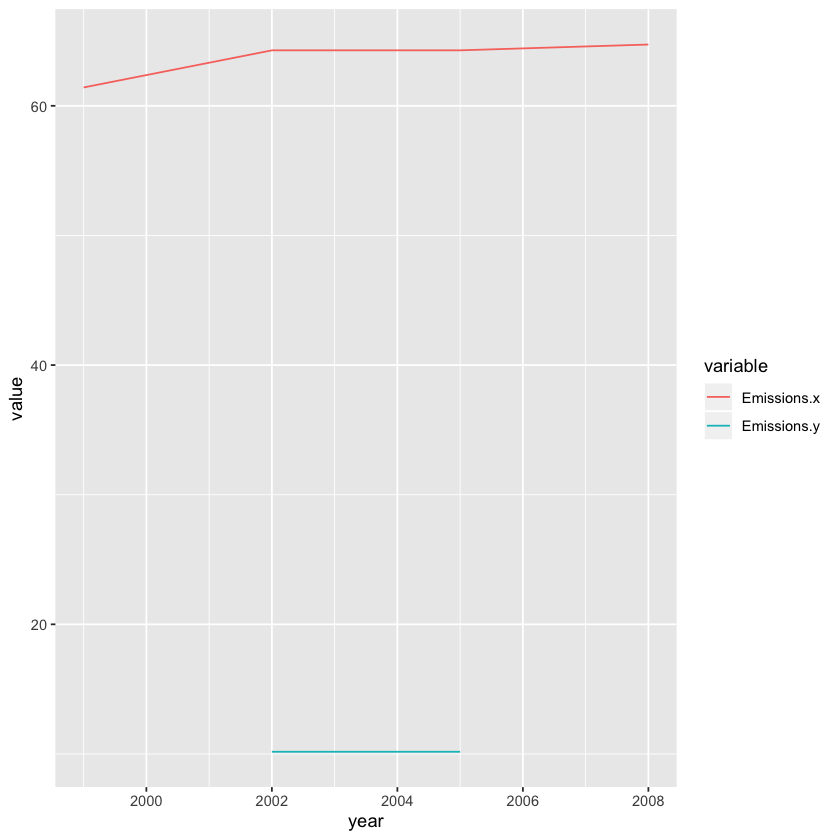

In [106]:
ggplot(melted, aes(x = year, y = value, col = variable)) + geom_line()